In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import warnings

warnings.filterwarnings("ignore")

# Province data scraping
* Dataset = **antaranews.com**

In [2]:
url = "https://www.antaranews.com/covid-19"

respone = requests.get(url)
respone.raise_for_status

<bound method Response.raise_for_status of <Response [200]>>

In [3]:
soup = BeautifulSoup(respone.text, "html.parser")

In [4]:
html_table_header = soup.find('table').find('tr').find_all('td')

table_header = []

for header in html_table_header:
    table_header.append(header.text)

In [5]:
table_header

['PROVINSI', 'DIRAWAT', 'TERKONFIRMASI', 'SEMBUH', 'MENINGGAL']

In [6]:
html_table_content = soup.find('table').find('tbody').find_all('tr')

table_content = []

for content in html_table_content:
    content2 = content.find_all('td')
    for description in content2:
        table_content.append(description.text)

In [7]:
data = np.array(table_content)

data = data.reshape(38,5)

In [8]:
df = pd.DataFrame(data, columns=table_header)

df.head()

,PROVINSI,DIRAWAT,TERKONFIRMASI,SEMBUH,MENINGGAL
0,DKI Jakarta,9.170,1.425.915,1.401.186,15.559
1,Jawa Barat,6.442,1.179.690,1.157.286,15.962
2,Jawa Tengah,1.584,637.982,602.855,33.543
3,Jawa Timur,914,604.991,572.269,31.808
4,Banten,1.655,337.052,332.447,2.950


In [9]:
df.tail()

,PROVINSI,DIRAWAT,TERKONFIRMASI,SEMBUH,MENINGGAL
33,Gorontalo,41,13.961,13.433,487
34,SUMATERA_SELATAN,5,11,6,0
35,B`,1,1,0,0
36,PROVINSI JAWA TENGAH,0,1,1,0
37,LAMPUNG TENGAH,1,1,0,0


# Data cleaning

In [10]:
df.drop(35, axis=0, inplace=True)

df.reset_index(drop=True, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PROVINSI       37 non-null     object
 1   DIRAWAT        37 non-null     object
 2   TERKONFIRMASI  37 non-null     object
 3   SEMBUH         37 non-null     object
 4   MENINGGAL      37 non-null     object
dtypes: object(5)
memory usage: 1.6+ KB


In [12]:
df['PROVINSI'] = df['PROVINSI'].str.replace("_"," ")

df['PROVINSI'] = df['PROVINSI'].str.replace("PROVINSI ","")

df['PROVINSI'] = df['PROVINSI'].apply(lambda x: x.capitalize())

In [13]:
int_col = df.columns[1:]

for col in int_col:
    df[col] = df[col].str.replace(".","")
    df[col] = df[col].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PROVINSI       37 non-null     object
 1   DIRAWAT        37 non-null     int32 
 2   TERKONFIRMASI  37 non-null     int32 
 3   SEMBUH         37 non-null     int32 
 4   MENINGGAL      37 non-null     int32 
dtypes: int32(4), object(1)
memory usage: 1016.0+ bytes


In [15]:
df.head()

,PROVINSI,DIRAWAT,TERKONFIRMASI,SEMBUH,MENINGGAL
0,Dki jakarta,9170,1425915,1401186,15559
1,Jawa barat,6442,1179690,1157286,15962
2,Jawa tengah,1584,637982,602855,33543
3,Jawa timur,914,604991,572269,31808
4,Banten,1655,337052,332447,2950


In [16]:
df.tail()

,PROVINSI,DIRAWAT,TERKONFIRMASI,SEMBUH,MENINGGAL
32,Maluku utara,15,14604,14255,334
33,Gorontalo,41,13961,13433,487
34,Sumatera selatan,5,11,6,0
35,Jawa tengah,0,1,1,0
36,Lampung tengah,1,1,0,0


In [17]:
df.iloc[36,0] = 'Lampung'

In [18]:
df = df.groupby('PROVINSI').sum().reset_index()

# EDA

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df.head()

,PROVINSI,DIRAWAT,TERKONFIRMASI,SEMBUH,MENINGGAL
0,Aceh,123,44190,41837,2230
1,Bali,309,167212,162166,4737
2,Banten,1655,337052,332447,2950
3,Bengkulu,60,29248,28665,523
4,Daerah istimewa yogyakarta,662,224741,218146,5933


<function matplotlib.pyplot.show(close=None, block=None)>

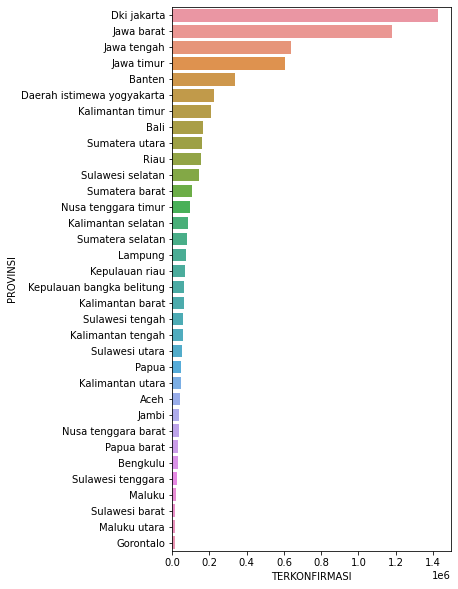

In [21]:
df_confirm = df.sort_values('TERKONFIRMASI', ascending=False)

plt.figure(figsize=[5,10])
sns.barplot(x='TERKONFIRMASI', y='PROVINSI', data=df_confirm, orient='horizontal')
plt.show

# Coordinates province scraping
* Dataset = **github.com/benangmerah/**

In [22]:
url = "https://github.com/benangmerah/wilayah/blob/master/datasources/daftar-nama-daerah.csv"

respone = requests.get(url)
respone.raise_for_status

<bound method Response.raise_for_status of <Response [200]>>

In [23]:
soup = BeautifulSoup(respone.text, "html.parser")

In [25]:
html_table = soup.find('table').find('tbody').find_all('tr')

df2 = pd.DataFrame(columns=['provinsi','latitude','longitude'])

for data in html_table:
    col = data.find_all('td')
    province = col[3].text
    lat = col[6].text
    long = col[7].text
    df2 = df2.append({'provinsi':province, 'latitude':lat, 'longitude':long}, ignore_index=True)

In [26]:
df2 = df2[df2.provinsi.str.contains("Provinsi")]

In [27]:
df2.tail()

,provinsi,latitude,longitude
28,Provinsi Sulawesi Barat,-2.8441371,119.2320784
29,Provinsi Maluku,-3.2384616,130.1452734
30,Provinsi Maluku Utara,1.5709993,127.8087693
31,Provinsi Papua Barat,-1.3361154,133.1747162
32,Provinsi Papua,-4.269928,138.0803529


In [28]:
df2.shape

(33, 3)

In [29]:
df2['provinsi'] = df2['provinsi'].str.replace("Provinsi ","")

In [30]:
df.drop(15, axis=0, inplace=True)
df = df.reset_index(drop=True)

In [31]:
a = df2['provinsi'].sort_values().reset_index(drop=True)
b = df['PROVINSI'].sort_values().reset_index(drop=True)
pd.concat([a,b], axis=1)

,provinsi,PROVINSI
0,Aceh,Aceh
1,Bali,Bali
2,Banten,Banten
3,Bengkulu,Bengkulu
4,DI Yogyakarta,Daerah istimewa yogyakarta
5,DKI Jakarta,Dki jakarta
6,Gorontalo,Gorontalo
7,Jambi,Jambi
8,Jawa Barat,Jawa barat
9,Jawa Tengah,Jawa tengah


## Concat 2 dataframe

In [32]:
df_concat = df.sort_values('PROVINSI').reset_index(drop=True)
df2_concat = df2.sort_values('provinsi').reset_index(drop=True)

In [33]:
df2_concat.drop(['provinsi'], axis=1, inplace=True)

In [34]:
df3 = pd.concat([df_concat,df2_concat], axis=1)
df3.head()

,PROVINSI,DIRAWAT,TERKONFIRMASI,SEMBUH,MENINGGAL,latitude,longitude
0,Aceh,123,44190,41837,2230,4.695135,96.7493993
1,Bali,309,167212,162166,4737,-8.4095178,115.188916
2,Banten,1655,337052,332447,2950,-6.4058172,106.0640179
3,Bengkulu,60,29248,28665,523,-3.5778471,102.3463875
4,Daerah istimewa yogyakarta,662,224741,218146,5933,-7.8753849,110.4262088


In [35]:
for col in df3.columns:
    df3 = df3.rename(columns={col:col.lower()})

In [36]:
df3['latitude'] = df3['latitude'].astype(float)
df3['longitude'] = df3['longitude'].astype(float)

In [37]:
df3.tail()

,provinsi,dirawat,terkonfirmasi,sembuh,meninggal,latitude,longitude
28,Sulawesi tenggara,67,25747,25110,570,-4.144910,122.174605
29,Sulawesi utara,428,53205,51557,1220,0.624693,123.975002
30,Sumatera barat,210,104796,102207,2379,-0.739940,100.800005
31,Sumatera selatan,264,82448,78802,3382,-3.319437,103.914399
32,Sumatera utara,435,159433,155702,3296,2.115355,99.545097


## Map plot using folium

In [38]:
import folium
from folium.plugins import MarkerCluster

In [39]:
df3[df3['provinsi'] == 'Sulawesi tengah']

,provinsi,dirawat,terkonfirmasi,sembuh,meninggal,latitude,longitude
27,Sulawesi tengah,173,61309,59402,1734,-1.430025,121.445618


In [40]:
indonesia_coordinate = [-1.430025, 121.445618]

site_map = folium.Map(location=indonesia_coordinate, zoom_start=4.5)

# site_map

In [41]:
for i in range(len(df3)):
    lat = df3.iloc[i,5]
    long = df3.iloc[i,6]
    pop = df3.iloc[i,0]

    circle1 = folium.Circle(
        [lat, long],
        radius=10000,
        tooltip=pop,
        fill=True
    )

    site_map.add_child(circle1)

site_map

In [42]:
marker_cluster_df1 = pd.concat([df3]*4, axis=0).sort_values('provinsi').reset_index(drop=True)

In [44]:
df_1 = df3.iloc[:,1:5]

data_df_2 = []
for i in range(0,(len(df_1))):
    for i,j in zip(df_1.columns, df_1.iloc[1].values):
        data_df_2.append([i,j])
len(data_df_2)

132

In [45]:
marker_cluster_df2 = pd.DataFrame(data_df_2, columns=['kategori','nilai'])
marker_cluster_df2

,kategori,nilai
0,dirawat,309
1,terkonfirmasi,167212
2,sembuh,162166
3,meninggal,4737
4,dirawat,309
...,...,...
127,meninggal,4737
128,dirawat,309
129,terkonfirmasi,167212
130,sembuh,162166


In [47]:
marker_cluster_df = pd.concat([marker_cluster_df1,marker_cluster_df2], axis=1)

marker_cluster_df

,provinsi,dirawat,terkonfirmasi,sembuh,meninggal,latitude,longitude,kategori,nilai
0,Aceh,123,44190,41837,2230,4.695135,96.749399,dirawat,309
1,Aceh,123,44190,41837,2230,4.695135,96.749399,terkonfirmasi,167212
2,Aceh,123,44190,41837,2230,4.695135,96.749399,sembuh,162166
3,Aceh,123,44190,41837,2230,4.695135,96.749399,meninggal,4737
4,Bali,309,167212,162166,4737,-8.409518,115.188916,dirawat,309
...,...,...,...,...,...,...,...,...,...
127,Sumatera selatan,264,82448,78802,3382,-3.319437,103.914399,meninggal,4737
128,Sumatera utara,435,159433,155702,3296,2.115355,99.545097,dirawat,309
129,Sumatera utara,435,159433,155702,3296,2.115355,99.545097,terkonfirmasi,167212
130,Sumatera utara,435,159433,155702,3296,2.115355,99.545097,sembuh,162166


In [48]:
marker_cluster_df.drop(marker_cluster_df.columns[1:5], axis=1, inplace=True)

In [49]:
marker_cluster_df.kategori.unique()

array(['dirawat', 'terkonfirmasi', 'sembuh', 'meninggal'], dtype=object)

In [50]:
dict_color = {
    'dirawat':'yellow',
    'terkonfirmasi':'blue',
    'sembuh':'green',
    'meninggal':'red'
}

marker_cluster_df['color'] = marker_cluster_df.kategori.map(dict_color)

In [51]:
marker_cluster_df.head()

,provinsi,latitude,longitude,kategori,nilai,color
0,Aceh,4.695135,96.749399,dirawat,309,yellow
1,Aceh,4.695135,96.749399,terkonfirmasi,167212,blue
2,Aceh,4.695135,96.749399,sembuh,162166,green
3,Aceh,4.695135,96.749399,meninggal,4737,red
4,Bali,-8.409518,115.188916,dirawat,309,yellow


In [52]:
marker_cluster = MarkerCluster()

site_map.add_child(marker_cluster)

for i in range(len(marker_cluster_df)):
    lat = marker_cluster_df.iloc[i,1]
    long = marker_cluster_df.iloc[i,2]
    pop = marker_cluster_df.iloc[i,3].capitalize() + ' : ' + str(marker_cluster_df.iloc[i,4]) 
    color = marker_cluster_df.iloc[i,5]
    
    marker2 = folium.Marker(
        [lat,long],
        tooltip=pop,
        icon=folium.Icon(color='white', icon_color=color)
    )

    marker_cluster.add_child(marker2)

site_map